MSE_train= 1.1867574343825074
MSE_test= 4.228633008156565


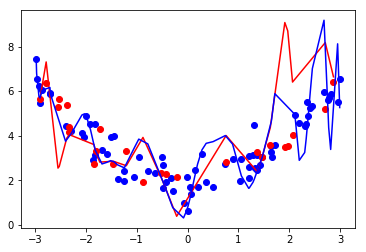

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + 0 + 2 + np.random.normal(0,0.5,size=100)

#划分样本
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

''''#线性回归
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_predict = lin_reg.predict(X_test)

#使用均方误差衡量线性回归
from sklearn.metrics import mean_squared_error
y_predict = lin_reg.predict(X_test)
MSE = mean_squared_error(y_test,y_predict)
print(MSE)

y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()'''

#使用多项式回归
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
def PolynomialRegression(degree):
    return Pipeline([("poly",PolynomialFeatures(degree=degree)),("std_scaler",StandardScaler()),("lin_reg",LinearRegression())])

poly2_reg = PolynomialRegression(degree=30)#degree=100,对训练数据的预测误差更小，但对测试数据的更大
poly2_reg.fit(X_train,y_train)
y2_predict_test = poly2_reg.predict(X_test)#预测测试数据
y2_predict_train = poly2_reg.predict(X_train)#预测训练数据

#使用均方误差衡量多项式回归
from sklearn.metrics import mean_squared_error
MSE_test = mean_squared_error(y_test,y2_predict_test)#训练数据均方差
MSE_train = mean_squared_error(y_train,y2_predict_train)#测试数据均方差
print("MSE_train=",MSE_train)
print("MSE_test=",MSE_test)


X_test = X_test[:,0]#降维，画图用
X_train = X_train[:,0]
plt.scatter(X_train, y_train,color='b')
plt.scatter(X_test, y_test,color='r')
plt.plot(np.sort(X_test), y2_predict_test[np.argsort(X_test)], color='r')
plt.plot(np.sort(X_train), y2_predict_train[np.argsort(X_train)], color='b')
plt.show()
